In [1]:
import gradio
import warnings
warnings.simplefilter('ignore')
import nussl
import matplotlib.pyplot as plt
import numpy as np
import librosa
# from common import viz

import base64
from io import BytesIO

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [2]:
audio_path = nussl.efz_utils.download_audio_file(
    'marimba_timbre.mp3')
audio_signal = nussl.AudioSignal(audio_path)
separator = nussl.separation.primitive.TimbreClustering(
    audio_signal, 2, 50, mask_type='binary')
estimates = separator()

estimates = {
    f'Cluster {i}': e for i, e in enumerate(estimates)
}

Matching file found at /Users/justachetan/.nussl/audio/marimba_timbre.mp3, skipping download.


In [3]:
def visualize_and_embed(sources):
    plt.figure(figsize=(10, 6))
    plt.subplot(211)
    nussl.utils.visualize_sources_as_masks(sources,
        y_axis='mel', db_cutoff=-60, alpha_amount=2.0)
    plt.subplot(212)
    nussl.utils.visualize_sources_as_waveform(
        sources, show_legend=False)
    plt.show()
    nussl.play_utils.multitrack(sources)

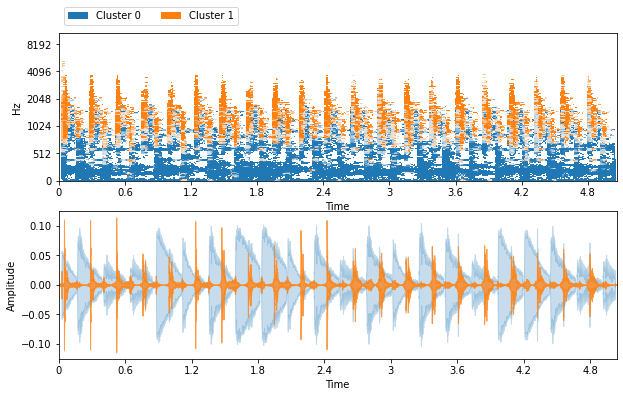


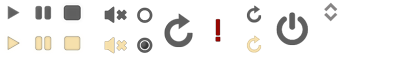
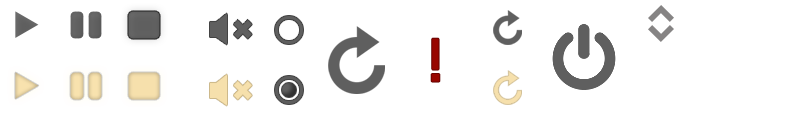
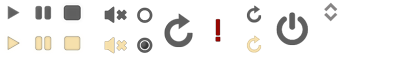

In [4]:
visualize_and_embed(estimates)

In [5]:


def gradio_fn(audio_file, result_mode, separator=separator):
    
    
    mix = nussl.AudioSignal(audio_file.name)
    audio_signal = mix
    estimates = separator()
#     if add_residual:
#         estimates.append(mix - estimates[0])
    
    estimates = {f'Estimate {i}': s for i, s in enumerate(estimates)}
    
    
    if result_mode == "Separated Audios":
        html = nussl.play_utils.multitrack(estimates, ext='.mp3', display=False)
        return html
    
    elif result_mode == "Overlaid Spectrogram":
        tmpfile = BytesIO()
        plt.figure()
    #     plt.subplot(211)
        nussl.utils.visualize_sources_as_masks(estimates,
            y_axis='mel', db_cutoff=-60, alpha_amount=2.0)
        
        plt.savefig(tmpfile, format='png')
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        
        html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)
        return html
    
    else:
#     plt.subplot(212)
        tmpfile = BytesIO()
        plt.figure()
        nussl.utils.visualize_sources_as_waveform(
            estimates, show_legend=False)
        plt.savefig(tmpfile, format='png')
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        
        html = '<img src=\'data:image/png;base64,{}\'>'.format(encoded)
        return html    


In [6]:
audio_in = gradio.inputs.Audio(source="upload", type="file", label="Input")

gradio.Interface(
    fn=gradio_fn, 
    inputs=[
        audio_in,
        gradio.inputs.Radio(["Separated Audios", "Overlaid Spectrogram", "Overlaid Waveforms"]),
    ],
    outputs=[gradio.outputs.HTML()],
    examples=[["testaudio.mp3", "audio"]]
).launch(share=True)


Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, email support@gradio.app
Running on External URL: https://45341.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://45341.gradio.app')

In [7]:
audio_path

'/Users/justachetan/.nussl/audio/marimba_timbre.mp3'